In [548]:
from astropy.io import fits
import numpy as np
from os.path import join
datype="n15_logxi_1"
rpath="/disk/bifrost/yuanze/xillver_res/Hon3.5"
rpath2="/disk/bifrost/yuanze/xillver-dev_newxstar"
rpath3="/disk/bifrost/yuanze/XILLVER-release-3.2.0"
version=""
bN=500+2
skip=bN*0
specEH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
#skip=bN*0
#version="3.5"
#specEH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
specEH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)

specEH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
#rpath2="/disk/bifrost/yuanze/xillver_res/Hon"
#specE2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=1002,skiprows=skip)
#fout2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
#fioniz2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=1002,skiprows=skip)


In [244]:
#Debugging...

from astropy.io import fits
import numpy as np
from os.path import join
datype="n15_logxi_2_1000bin"
rpath="/disk/bifrost/yuanze/xillver-dev_newxstar"
skip=0
specE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=0,max_rows=1002,skiprows=skip)
#fout=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
fioniz1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=1,max_rows=1002,skiprows=skip)
specE2=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=0,max_rows=1002,skiprows=skip)
#fout=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
fioniz2=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=1002,skiprows=skip)

In [430]:
import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits

import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits

# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot

plt.rc('axes', labelsize=14)  # fontsize of the x any y labels

# Load local models
#AllModels.lmod("relxill")

# Energies
AllModels.setEnergies("0.1 1000. 100 log")

# Define the Model
m1 = Model("pexrav")
Xset.abund="grsa"
m1(1).values = "2.0"      # powerlaw   PhoIndex
m1(2).values = "100.0"      # pexrav   Ecut
m1(3).values = "-1 -0.01 -2 -2 10 10"      # pexrav   Rref
m1(7).values = "0.5735"   # pexrav cosIncl

Plot("eemodel")
xvals = Plot.x()
yvals = Plot.model()

m1(3).values = "0"
Plot("eemodel")
xorgvals = Plot.x()
yorgvals = Plot.model()



Models will now use energy array created from:
   0.1 - 1000   100 log bins


Model pexrav<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   pexrav     PhoIndex            2.00000      +/-  0.0          
   2    1   pexrav     foldE      keV      100.000      +/-  0.0          
   3    1   pexrav     rel_refl            0.0          +/-  0.0          
   4    1   pexrav     Redshift            0.0          frozen
   5    1   pexrav     abund               1.00000      frozen
   6    1   pexrav     Fe_abund            1.00000      frozen
   7    1   pexrav     cosIncl             0.450000     frozen
   8    1   pexrav     norm                1.00000      +/-  0.0          
________________________________________________________________________

 Solar Abundance Vector set to grsa:  Grevesse, N. & Sauval, A. J. Space Science Reviews 85, 161 (1998)


<Figure size 640x480 with 0 Axes>

In [341]:
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
c=2.99792458e10
#E/hev=nu
def bbev(E,T):
    return 2*h*(E/hev)**3./c**2/(np.exp(h*(E/hev)/(kb*T)) - 1.)

In [308]:
from astropy.io import fits
import numpy as np
from os.path import join
datype="n20_logxi_3"
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype)
bN=5000
skip=bN*0
specE1=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#specEE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
#fionizEE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=1,max_rows=bN,skiprows=skip)
fdown=np.loadtxt(join(rpath,"current/spectr"),usecols=4,max_rows=bN,skiprows=skip)
#plt.plot(specE1/1e3,fdown,"b",label="Xillver_3.5(2012)",ms=1,lw=0.5)
#plt.plot(specE1/1e3,foutE1,"r",label="Xillver_3.5(2012)",ms=1,lw=0.5)
#plt.yscale("log")
#plt.xscale("log")

#rpath2="/disk/bifrost/yuanze/xillver_res/Hon"
#specE2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=1002,skiprows=skip)
#fout2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
#fioniz2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=1002,skiprows=skip)



/tmp/ipykernel_3165994/3526528499.py:14: UserWarning: Input line 5002 contained no data and will not be counted towards `max_rows=5000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  jnuN=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1+bN)


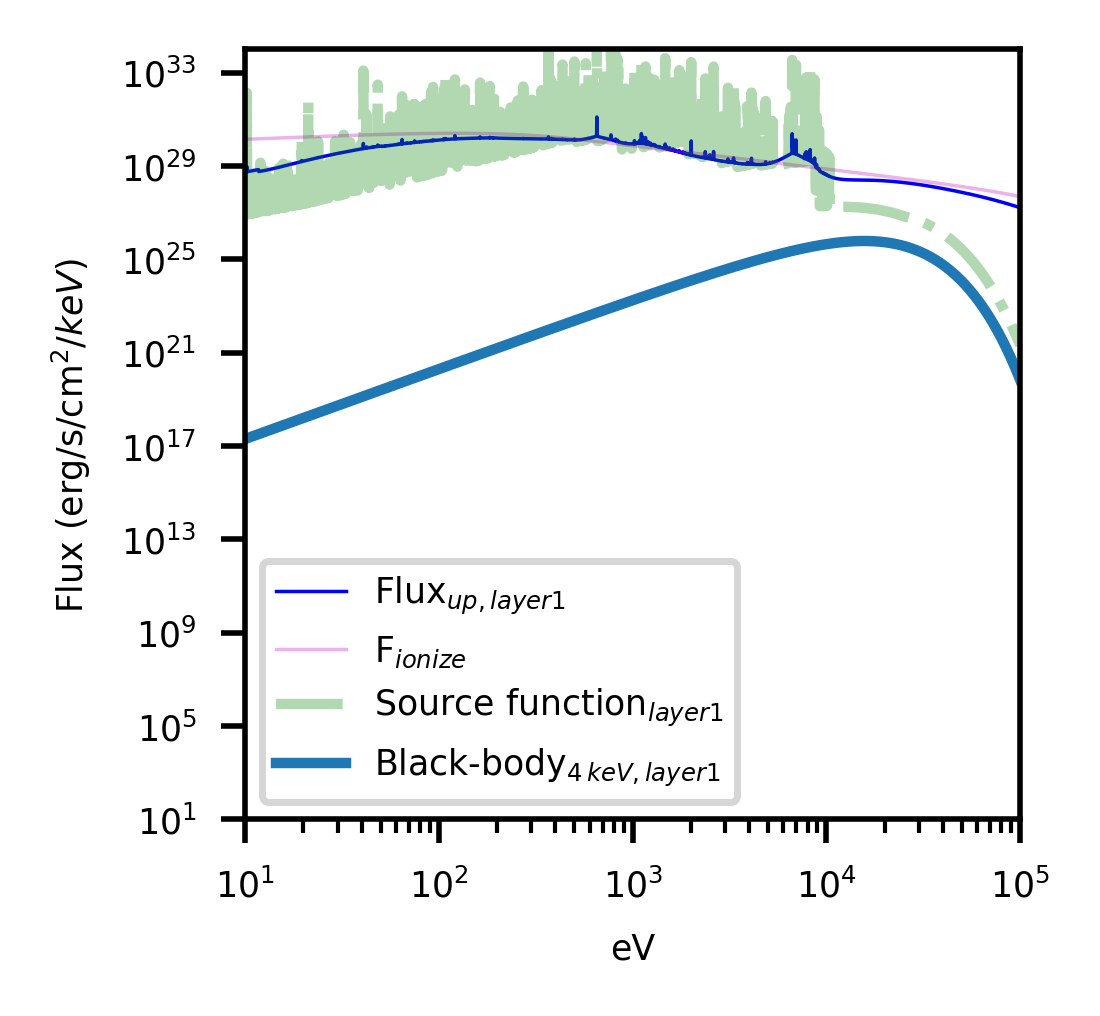

In [343]:
import matplotlib.pyplot as plt

datype="n20_logxi_3"
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype)
bN=5000
trunc=0
skip=bN*0

fig=plt.figure(figsize=(2,2),dpi=500)
gs = fig.add_gridspec(1,1)
axs=gs.subplots()

jnu=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1)
jnuN=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1+bN)

opa=np.loadtxt(join(rpath,"current/fullspec"),usecols=4,max_rows=bN-trunc,skiprows=skip+1)
spec=np.loadtxt(join(rpath,"current/fullspec"),usecols=1,max_rows=bN-trunc,skiprows=skip+1)


axs.plot(specE1,foutE1,"b",label=r"Flux$_{up,layer1}$",ms=1,lw=0.5)
axs.plot(specE1,fionizE1,"m",label=r"F$_{ionize}$",ms=1,lw=0.5,alpha=0.3)
axs.plot(specE1,jnu/opa,"g-.",label=r"Source function$_{layer1}$",alpha=0.3)
axs.plot(specE1,bbev(specE1,4000*eV/kb),label=r'Black-body$_{4\,keV,layer1}$')
axs.set_xlim([10,1e5])
axs.set_ylim([1e1,1e34])
axs.legend()
axs.set_ylabel(r"Flux (erg/s/cm$^2/keV$)")
axs.set_xlabel("eV")
axs.set_yscale("log")
axs.set_xscale("log")

In [639]:
2189*eV/kb

25398551.45940465

In [624]:
jnu=np.loadtxt(join(rpath,"current/fullspec"),max_rows=3800,skiprows=1)

In [344]:
from astropy.io import fits
import numpy as np
from os.path import join
datype="n20_logxi_3"
specnnum="6"
bN=5000
skip=(bN+2)*0
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

#with warnings.catch_warnings():    
#    warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')
ite=14
skip=(bN+2)*ite
rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction1=np.loadtxt(join(rpatho,"current/fractions"))
#fionizE11=np.loadtxt(join(rpatho,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
tempeV1=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp1=tempeV1*eV/kb
ite=0
skip=(bN+2)*ite
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype+"_bin1000")
specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE2=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fraction2=np.loadtxt(join(rpath,"current/fractions_o"))
depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=0)
tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp2=tempeV2*eV/kb

#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')

#fionizE22=np.loadtxt(join(rpath,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
#fionizE22in=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=bN,skiprows=0)
#rpath82=join("/disk/bifrost/yuanze/xillver_res/ktbb1_no82",datype)
#specE3=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=bN*1)
#foutE3=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=bN*1)
#fionizE3=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=bN*1)



rxinput=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec%s_output.dat"%specnnum).T
rxinput2=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec5_output.dat").T



#fspecE=np.loadtxt(join(rpath,"fullspec"),usecols=1,max_rows=500,skiprows=1)
#fIout=np.loadtxt(join(rpath,"fullspec"),usecols=2,max_rows=500,skiprows=1)

/tmp/ipykernel_3165994/662233006.py:18: UserWarning: loadtxt: input contained no data: "/disk/bifrost/yuanze/xillver_res/ktbb1/n20_logxi_3_bin5000/current/spectr"
  specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
/tmp/ipykernel_3165994/662233006.py:19: UserWarning: loadtxt: input contained no data: "/disk/bifrost/yuanze/xillver_res/ktbb1/n20_logxi_3_bin5000/current/spectr"
  foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
/tmp/ipykernel_3165994/662233006.py:20: UserWarning: loadtxt: input contained no data: "/disk/bifrost/yuanze/xillver_res/ktbb1/n20_logxi_3_bin5000/current/spectr"
  fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
/tmp/ipykernel_3165994/662233006.py:29: UserWarning: Input line 1001 contained no data and will not be counted towards `max_rows=5000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous

In [222]:
layer=1
ite=14
print(np.shape(fraction2))
print(np.shape(fraction1))
#fraction=fraction2[ite*(3*200)+(layer-1)*3]


(200, 465)
(200, 465)


In [289]:
import bisect
import matplotlib.pyplot as plt


feselected=['fe_1','fe_2','fe_3','fe_4','fe_5','fe_6','fe_7','fe_8','fe_9','fe_10','fe_11','fe_12','fe_13','fe_14','fe_15','fe_16','fe_17','fe_18','fe_19','fe_20','fe_21','fe_22','fe_23','fe_24','fe_25','fe_26']

elements=['h','he','li','be','b','c','n','o','f','ne','na','mg','al','si','p','s','cl','ar','k','ca','sc','ti','v','cr','mn','fe','co','ni','cu','zn']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

spect=[]
specto=[]
linedic={}
linedico={}
for layer in range(1,201):

    fractiono=fraction1[layer-1]
    fraction=fraction2[layer-1]
    for ind in range(len(fraction)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            linedic[elements[k]+"_%d"%(ind+1)]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=fractiono[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=fractiono[ind]
    spect.append(linedic.copy())
    specto.append(linedico.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

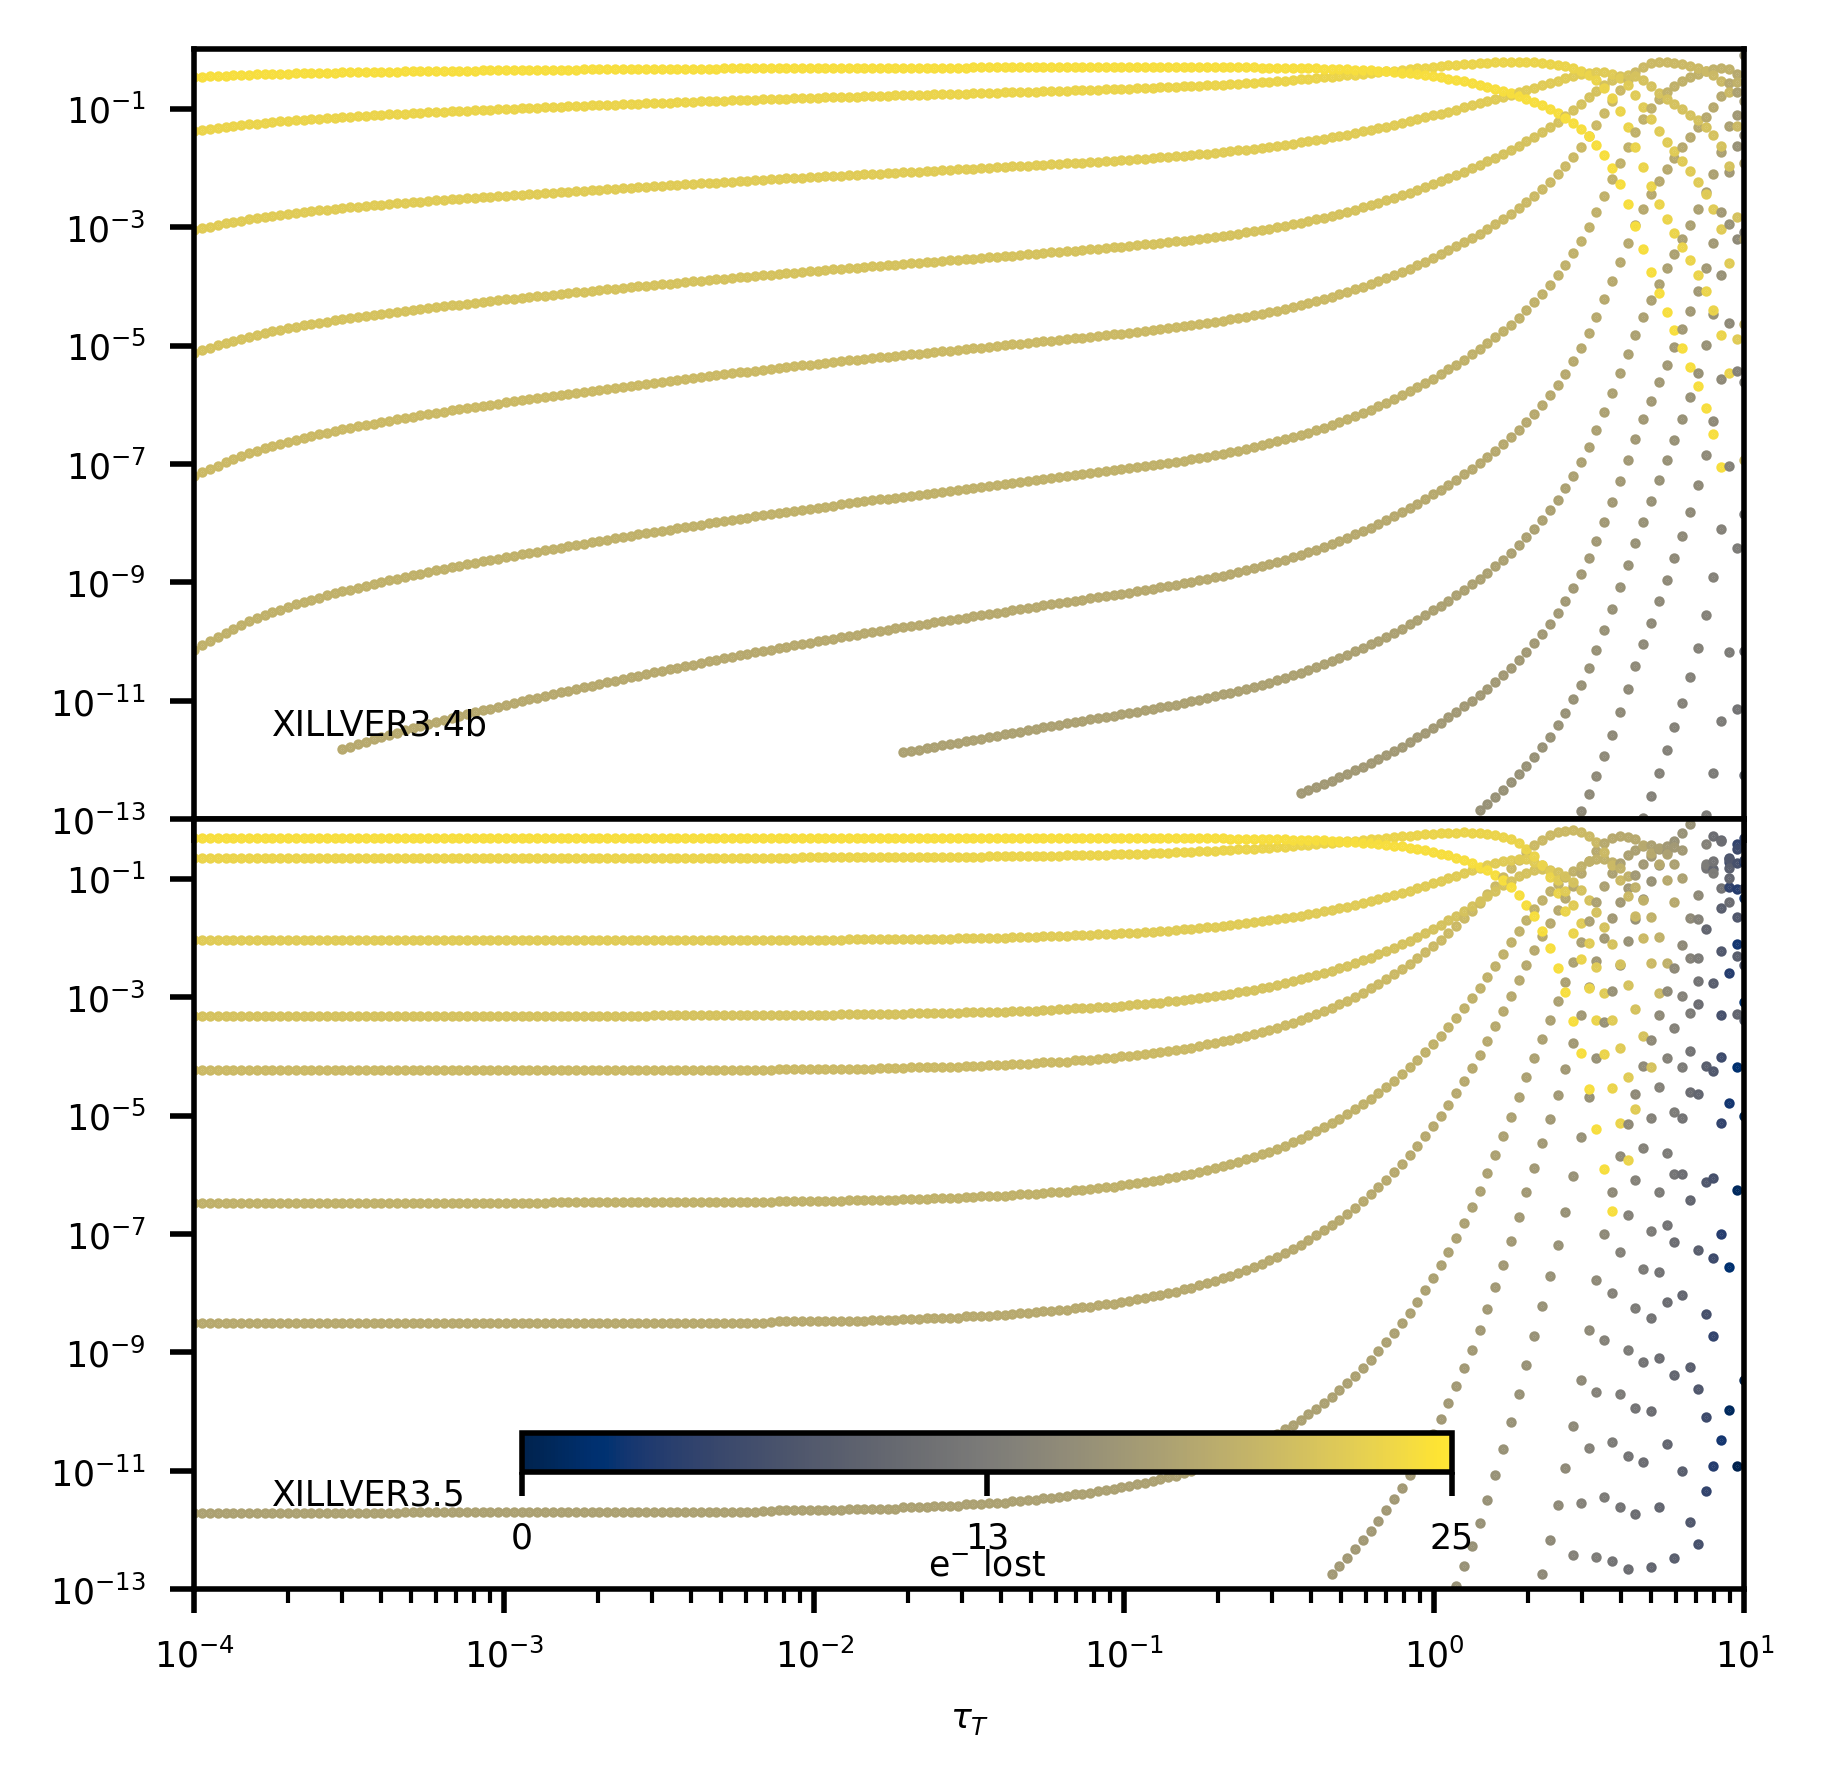

In [296]:
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
colors=matplotlib.cm.cividis(np.arange(26)/26)

for layer in range(1,201):
    for eind,e in enumerate(feselected):
        #print(e)
        #print(spect[layer-1][e])
        if layer==200:
            axdict1[e]=axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axdict2[e]=axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
        else:
            axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,3),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"e$^{-}$ lost", labelpad=-1)
cbar.ax.set_xticklabels(['0','13','25'])
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([1e-13,1])
axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("Ironstate.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [ ]:
numrow=1
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

ms=0.5



axs.plot(depth,temp,color=C1,lw=0.5,label="ite {}".format(ite))
#axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs.set_ylim([1e-13,1])
axs.set_xlim([1e-4,10])

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("Ironstate.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [225]:
gind=fraction>1e-15
gindo=fractiono>1e-15
feselected=['fe_18','fe_19','fe_20','fe_21','fe_22','fe_23','fe_24','fe_25','fe_26']
#print(gind)
glinetab=np.array(linetab)[gind]
glinetabo=np.array(linetab)[gindo]
#gfraction=fraction[gind]
#feind = glinetab==feselected

print([linedic[e] for e in feselected])
print([linedico[e] for e in feselected])
print(glinetab)
print(glinetabo)



[0.0334615, 0.207678, 0.526593, 0.146037, 0.0789922, 0.00384452, 0.000142551, 6.86447e-06]
[0.0, 0.0, 0.0, 7.35571e-11, 6.29749e-08, 7.48663e-06, 0.000899651, 0.0414659]
['h_1' 'he_1' 'he_2' 'c_3' 'c_4' 'c_5' 'c_6' 'n_4' 'n_5' 'n_6' 'n_7' 'o_4'
 'o_5' 'o_6' 'o_7' 'o_8' 'ne_5' 'ne_6' 'ne_7' 'ne_8' 'ne_9' 'ne_10' 'mg_6'
 'mg_7' 'mg_8' 'mg_9' 'mg_10' 'mg_11' 'mg_12' 'si_6' 'si_7' 'si_8' 'si_9'
 'si_10' 'si_11' 'si_12' 'si_13' 'si_14' 's_8' 's_9' 's_10' 's_11' 's_12'
 's_13' 's_14' 's_15' 's_16' 'ar_9' 'ar_10' 'ar_11' 'ar_12' 'ar_13'
 'ar_14' 'ar_15' 'ar_16' 'ar_17' 'ar_18' 'ca_10' 'ca_11' 'ca_12' 'ca_13'
 'ca_14' 'ca_15' 'ca_16' 'ca_17' 'ca_18' 'ca_19' 'ca_20' 'fe_12' 'fe_13'
 'fe_14' 'fe_15' 'fe_16' 'fe_17' 'fe_18' 'fe_19' 'fe_20' 'fe_21' 'fe_22'
 'fe_23' 'fe_24' 'fe_25' 'ni_15' 'ni_16' 'ni_17' 'ni_18' 'ni_19' 'ni_20'
 'ni_21' 'ni_22' 'ni_23' 'ni_24' 'ni_25' 'ni_26']
['h_1' 'he_1' 'he_2' 'c_4' 'c_5' 'c_6' 'n_5' 'n_6' 'n_7' 'o_6' 'o_7' 'o_8'
 'ne_8' 'ne_9' 'ne_10' 'mg_9' 'mg_10' 'mg_11' '

In [284]:
print(spect[199])

{'h_1': 0.928236, 'he_1': 0.999987, 'he_2': 1.29601e-05, 'li_1': 0.0, 'li_2': 0.0, 'li_3': 0.0, 'be_1': 0.0, 'be_2': 0.0, 'be_3': 0.0, 'be_4': 0.0, 'b_1': 0.0, 'b_2': 0.0, 'b_3': 0.0, 'b_4': 0.0, 'b_5': 0.0, 'c_1': 0.878277, 'c_2': 0.115638, 'c_3': 0.00608484, 'c_4': 5.55791e-09, 'c_5': 5.61252e-14, 'c_6': 4.13929e-15, 'n_1': 0.225203, 'n_2': 0.771549, 'n_3': 0.00312781, 'n_4': 5.53472e-05, 'n_5': 5.59856e-05, 'n_6': 0.0, 'n_7': 0.0, 'o_1': 0.961023, 'o_2': 0.0384018, 'o_3': 0.000574854, 'o_4': 3.25009e-07, 'o_5': 0.0, 'o_6': 0.0, 'o_7': 0.0, 'o_8': 0.0, 'f_1': 0.0, 'f_2': 0.0, 'f_3': 0.0, 'f_4': 0.0, 'f_5': 0.0, 'f_6': 0.0, 'f_7': 0.0, 'f_8': 0.0, 'f_9': 0.0, 'ne_1': 0.186508, 'ne_2': 0.532218, 'ne_3': 0.281262, 'ne_4': 1.15716e-05, 'ne_5': 8.85129e-07, 'ne_6': 1.69701e-08, 'ne_7': 0.0, 'ne_8': 0.0, 'ne_9': 0.0, 'ne_10': 0.0, 'na_1': 0.0, 'na_2': 0.0, 'na_3': 0.0, 'na_4': 0.0, 'na_5': 0.0, 'na_6': 0.0, 'na_7': 0.0, 'na_8': 0.0, 'na_9': 0.0, 'na_10': 0.0, 'na_11': 0.0, 'mg_1': 7.59522e

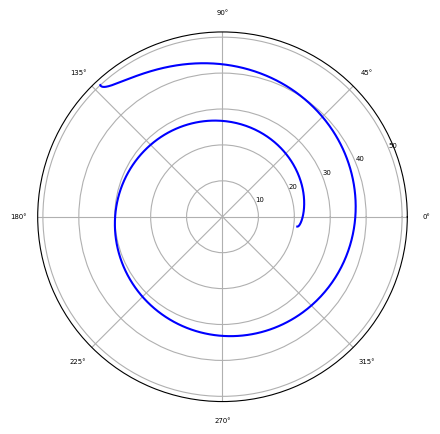

In [176]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt

rin=np.linspace(0.1,10,1000)
rde=np.linspace(10,20.9,1000)
rout=np.linspace(21,50,1000)
##Acoustic wave:omega<Omega or omega>3*Omega
def Omega(r):
    return np.sqrt(1/r**3)

def Kac(r):
    Cs=0.05
    omega=0.0316
    return np.sqrt((omega**2-4*omega*Omega(r)+3*Omega(r)**2)/Cs**2)

def Kde(r):
    gsigma=2e-5
    return -(omega**2-4*omega*Omega(r)+3*Omega(r)**2)/(2*np.pi*gsigma)


phi=[]
phi2=[]
phide=[]
#print(rin)
#for rs in rin:
#    phi.append(np.array(integrate.quad(Kac,0.0001,rs)[0])/2)
#for rs in rout:
#    phi2.append(np.array(integrate.quad(Kac,20.9,rs)[0])/2)
for rs in rde:
    phide.append(np.array(integrate.quad(Kde,10.5,rs)[0])/2)
#print(K(rin))
#print(Omega(rin))
#print(Omega(rout))
#print(omega**2-4*omega*Omega(2)+3*Omega(2)**2)
#print(phi)
#plt.polar(phi,rin, 'r-')
#plt.polar(phi2,rout, 'r-')
plt.polar(phide,rout, 'b-')
plt.savefig('densityW.png',dpi=500)

In [575]:
Intensity=bbnu(specE1*eV/h,2263*eV/kb)

In [608]:
Intensity=bbnu(6336*eV/h,2263*eV/kb)
print(specE1[950])

2.272864111


Text(0.05, 0.9, 'n20_logxi_3')

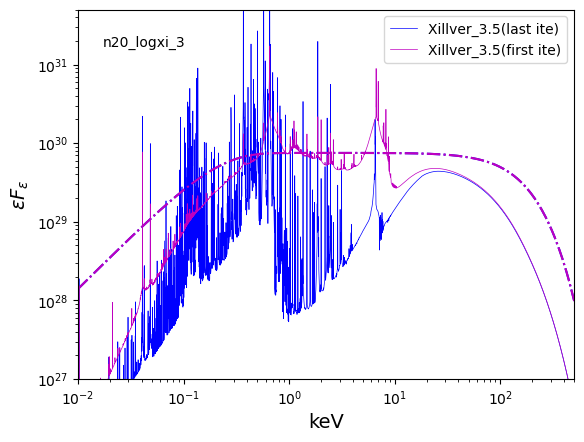

In [831]:
import matplotlib.pyplot as plt
fac=1e20

#nac=1.
#plt.plot(rxinput[0],fac*rxinput[2],"r-.")
#plt.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx",lw=0.5)

#plt.plot(specE1/1e3,nac*foutE1*specE1/1e3,"c",label="Xillver_3.4b",ms=1)
#plt.plot(specE1/1e3,nac*fionizE1*specE1/1e3,"c-.",ms=0.5)
#plt.plot(specE1[:4000]/1e3,fionizE11[:4000]*specE1[:4000]/1e3,"g-.",ms=0.5)

plt.plot(specE2/1e3,foutE2*specE2/1e3,"b",ms=0.5,label="Xillver_3.5(last ite)",lw=0.5)
plt.plot(specE2/1e3,fionizE2*specE2/1e3,"b-.",ms=0.5)
#plt.plot(specE2[:4000]/1e3,fionizE22[:4000]*specE2[:4000]/1e3,"g--",ms=0.5)
#plt.plot(specE2[:4000]/1e3,fionizE22in[:4000]*specE2[:4000]/1e3,"g--",ms=0.5)
plt.plot(specE3/1e3,foutE3*specE3/1e3,"m",ms=0.5,label="Xillver_3.5(first ite)",lw=0.5)
plt.plot(specE3/1e3,fionizE3*specE3/1e3,"m-.",ms=0.5)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


plt.xscale("log")
plt.legend()
plt.yscale("log")
plt.xlabel("keV")
plt.ylabel(r"$\epsilon F_{\epsilon}$")
plt.xlim([1e-2,500])
plt.ylim([1e27,5e31])
#plt.axvline(x=)
axs=plt.gca()
plt.text(0.05,0.9,datype,transform=axs.transAxes)
#plt.savefig("compRX"+datype,dpi=300)

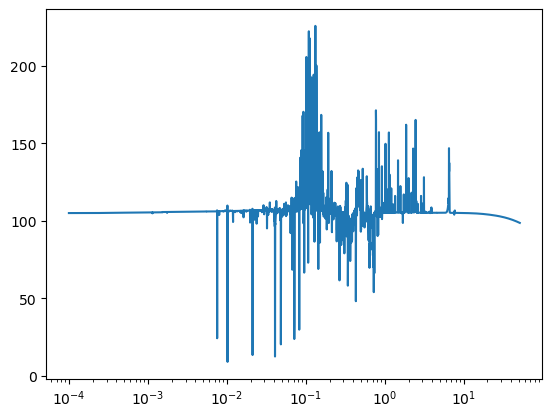

In [790]:
ra=fionizE22[:4000]/fionizE22in[:4000]
plt.plot(specE2[:4000]/1e3,ra)
plt.xscale("log")

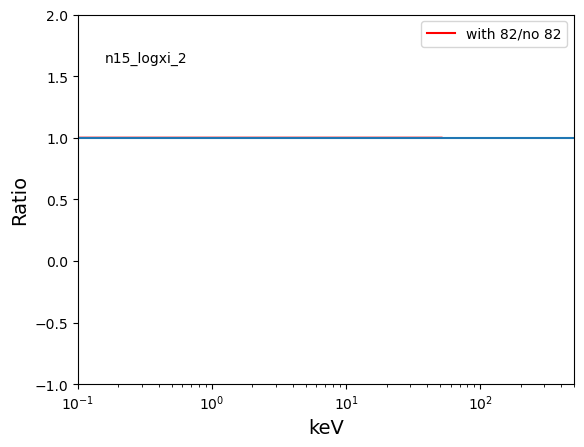

In [731]:
plt.plot(specE1[:4000]/1e3,foutE1[:4000]/foutE3[:4000],"r",ms=0.5,label="with 82/no 82")
plt.legend()
plt.axhline(y=1)
plt.text(0.05,0.9,datype,transform=axs.transAxes)
plt.xlabel("keV")
plt.ylabel("Ratio")
plt.xlim([0.1,500])
plt.ylim([-1,2])
plt.xscale("log")

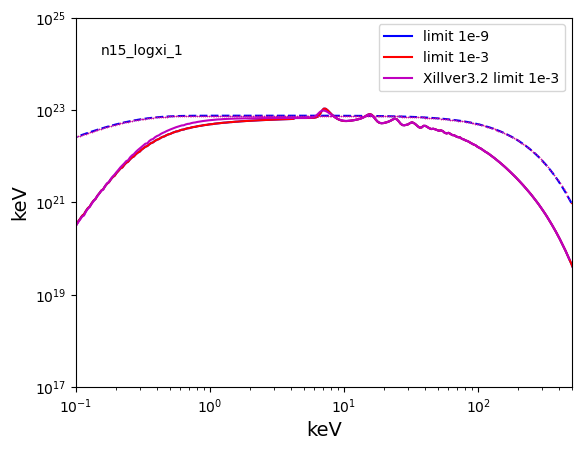

In [550]:
#Comparing Comptonization....

import matplotlib.pyplot as plt
fac=1e20
#plt.plot(rxinput[0],fac*rxinput[2],"r-.")
#plt.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx")
#plt.plot(rxinput2[0],fac*rxinput2[1],"r",label="Reflionx")
plt.plot(specEH1/1e3,foutH1*specEH1/1e3,"b",label="limit 1e-9",ms=1)
plt.plot(specEH1/1e3,fionizH1*specEH1/1e3,"b--",ms=0.5)

plt.plot(specEH2/1e3,fionizH2*specEH2/1e3,"r*",ms=0.5)
plt.plot(specEH2/1e3,foutH2*specEH2/1e3,"r",ms=0.5,label="limit 1e-3")

plt.plot(specEH3/1e3,fionizH3*specEH3/1e3,"m*",ms=0.5)
plt.plot(specEH3/1e3,foutH3*specEH3/1e3,"m",ms=0.5,label="Xillver3.2 limit 1e-3")
#plt.plot(specE2/1e3,fout2*specE2/1e3,"ro",label="Xillver_3.4b",ms=0.5)
#plt.plot(specE2/1e3,fioniz2*specE2/1e3,"r-.",ms=0.5)
#pfac=1e25
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


plt.xscale("log")
plt.legend()
plt.yscale("log")
plt.xlabel("keV")
plt.ylabel("keV")
plt.xlim([1e-1,500])
plt.ylim([1e17,1e25])
axs=plt.gca()
plt.text(0.05,0.9,datype,transform=axs.transAxes)
plt.savefig("limit_9.png",dpi=300)

In [475]:
print(specEH1)

[1.00000000e-01 1.01658968e-01 1.03345457e-01 1.05059924e-01
 1.06802835e-01 1.08574659e-01 1.10375877e-01 1.12206977e-01
 1.14068455e-01 1.15960813e-01 1.17884566e-01 1.19840232e-01
 1.21828343e-01 1.23849436e-01 1.25904058e-01 1.27992765e-01
 1.30116124e-01 1.32274708e-01 1.34469102e-01 1.36699901e-01
 1.38967708e-01 1.41273138e-01 1.43616813e-01 1.45999369e-01
 1.48421452e-01 1.50883715e-01 1.53386827e-01 1.55931465e-01
 1.58518317e-01 1.61148085e-01 1.63821479e-01 1.66539225e-01
 1.69302056e-01 1.72110723e-01 1.74965984e-01 1.77868613e-01
 1.80819395e-01 1.83819130e-01 1.86868630e-01 1.89968720e-01
 1.93120240e-01 1.96324042e-01 1.99580994e-01 2.02891978e-01
 2.06257890e-01 2.09679641e-01 2.13158159e-01 2.16694383e-01
 2.20289273e-01 2.23943801e-01 2.27658956e-01 2.31435744e-01
 2.35275188e-01 2.39178327e-01 2.43146218e-01 2.47179935e-01
 2.51280570e-01 2.55449233e-01 2.59687053e-01 2.63995177e-01
 2.68374771e-01 2.72827022e-01 2.77353133e-01 2.81954332e-01
 2.86631863e-01 2.913869

In [315]:
##Testing the difference between 2.57 and 2.58e




import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
org1data={'energy':[],'transmit':[],'density':[],'column':[],"logxi":[]}

org2data={'energy':[],'transmit':[],'density':[],'column':[],"logxi":[]}
dbtype="HD"

dselect=np.array(["20"])
cselect=np.array(["1.E+20","1.E+21","1.E+22"])
xselect=np.array(["1","2","3"])

#emit_out=[]

norm=1e-1
# Energies
AllModels.setEnergies("0.1 5. 1000 log")
Plot.xAxis = "keV"
for i,dense in enumerate(dselect):
    for j,column in enumerate(cselect):
        for k,logxi in enumerate(xselect):
            # Define the Model
            m1 = Model("pow*mtable{/Users/ding/xstarHD/result/stable/xstar_%s/n%s_re/xout_mtable.fits}"%(dbtype,dense))

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            org1data['energy'].append(Plot.x())
            org1data['transmit'].append(Plot.model())
            org1data['density'].append(dense)
            org1data['column'].append(column)
            org1data['logxi'].append(logxi)
            AllModels.clear()
            
            m1 = Model("pow*mtable{/Users/ding/xstarHD/result/xstar_257_210616/n%s_re/xout_mtable.fits}"%(dense))

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            org2data['energy'].append(Plot.x())
            org2data['transmit'].append(Plot.model())
            org2data['density'].append(dense)
            org2data['column'].append(column)
            org2data['logxi'].append(logxi)
            AllModels.clear()

            


Models will now use energy array created from:
   0.1 - 5   1000 log bins

New filename ( "none" or "/*" to return to the XSPEC prompt): No such file: 
New filename ( "none" or "/*" to return to the XSPEC prompt): No such file: 
New filename ( "none" or "/*" to return to the XSPEC prompt): 

Error: cannot read file /Users/ding/xstarHD/result/stable/xstar_HD/n20_re/xout_mtable.fits
terminated at user request


Exception: Model Command Error

/tmp/ipykernel_3165994/3659947389.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


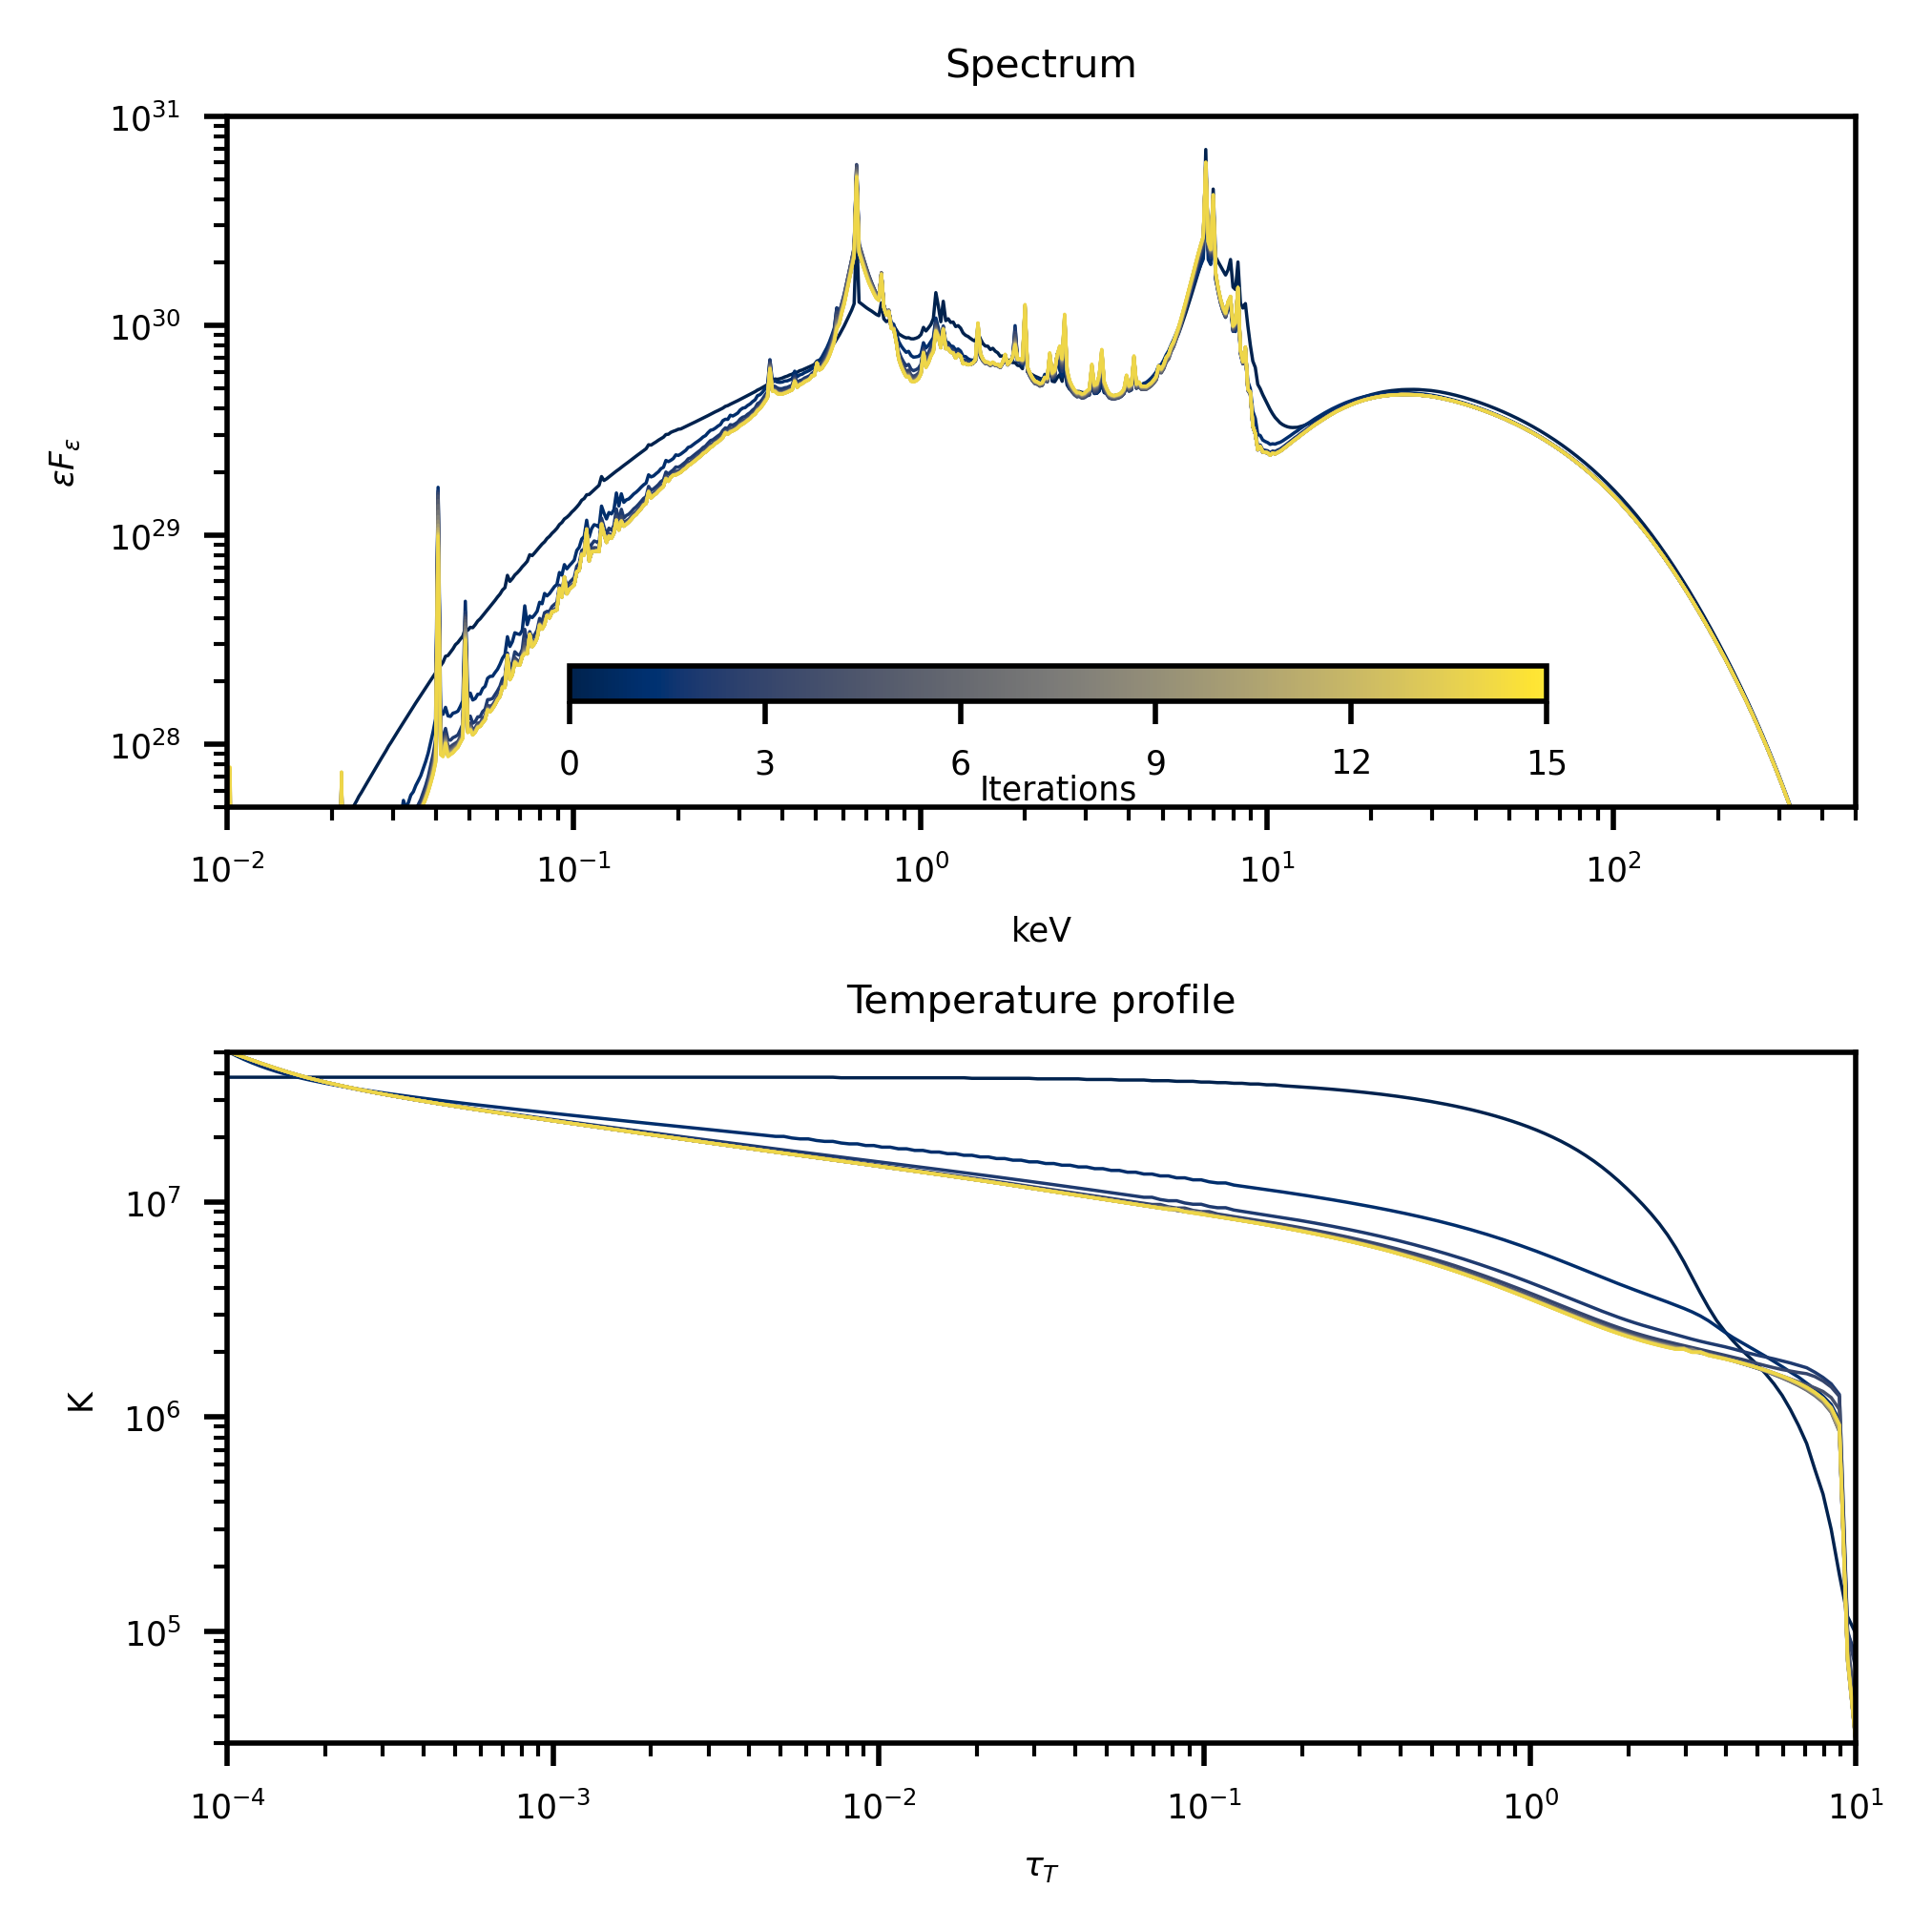

In [60]:
#Comparing through different iterations

import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import warnings
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os.path import join
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
plt.style.available
#plt.style.use(["science"])
cmap = matplotlib.cm.get_cmap('cividis')

datype="n20_logxi_3"
bN=1000
ixmax=15
rpatho=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype+"_bin1000")
eV=1.602e-12
kb=1.3807e-16

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol)
axs=gs.subplots()
sm = plt.cm.ScalarMappable(cmap=cmap)
colors=matplotlib.cm.cividis(np.arange(ixmax)/ixmax)
for ite in range(ixmax):
    skip=(bN+2)*ite
    depth=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    tempeV=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp=tempeV*eV/kb
    spec=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    fout=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    #fioniz=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')
    
    axs[0].plot(spec/1e3,fout*spec/1e3,color=colors[ite],lw=0.5,label="iteration {}".format(ite))

    axs[1].plot(depth,temp,color=colors[ite],lw=0.5,label="ite {}".format(ite))
    #fraction1=np.loadtxt(join(rpatho,"current/spectr"))
#axs[0].plot(spec/1e3,fioniz*spec/1e3,"C{}".format(ite),lw=0.5,label="iteration {}".format(ite))



axins0 = inset_axes(axs[0],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[0].transAxes)
#axins1 = inset_axes(axs[1],
                    #width="60%",  # width = 50% of parent_bbox width
                    #height="5%",  # height : 5%
                    #loc='upper left',
                    #bbox_to_anchor=(0.2,0.0,1,1),
                    #bbox_transform=axs[1].transAxes)

cbar=plt.colorbar(sm, ticks=np.linspace(0,1,6),orientation="horizontal",cax=axins0)
cbar.set_label(label="Iterations", labelpad=-1)
cbar.ax.set_xticklabels(['0','3','6','9','12','15'])
#plt.colorbar(sm, ticks=np.linspace(0,15,5),format='%d',cax=axins1,orientation="horizontal",label="Iterations")


#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
axs[0].set_title("Spectrum")
axs[1].set_title("Temperature profile")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim([1e-4,10])
axs[1].set_ylim([3e4,5e7])
axs[1].set_xlabel(r"$\tau_{T}$")
axs[1].set_ylabel("K")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel("keV")
axs[0].set_ylabel(r"$\epsilon F_{\epsilon}$")
axs[0].set_xlim([1e-2,500])
axs[0].set_ylim([5e27,1e31])

fig.tight_layout()